In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

In [115]:
temp=pd.read_csv('temp_annual.csv')
temp.rename(columns={"Unnamed: 0": "annual"},inplace=True)
temp

annual   1901   1902   1903   1904  1905   1906   1907   1908   1909  ...  \
0  ANNUAL  28.96  29.22  28.47  28.49  28.3  28.73  28.65  28.83  28.38  ...   

    2008  2009   2010   2011   2012   2013   2014  2015   2016   2017  
0  29.64  30.3  30.13  29.82  29.81  29.81  29.72  29.9  31.63  31.42  

[1 rows x 118 columns]

In [116]:
l=[]
for i in range(1990,2016):
    x=str(i)
    l.append(x)
df=temp[l]
df

1990   1991   1992   1993   1994   1995   1996   1997  1998   1999  ...  \
0  29.14  29.32  29.23  29.55  29.46  30.18  29.58  29.05  29.7  29.81  ...   

    2006   2007   2008  2009   2010   2011   2012   2013   2014  2015  
0  30.06  29.84  29.64  30.3  30.13  29.82  29.81  29.81  29.72  29.9  

[1 rows x 26 columns]

In [117]:
s02=pd.read_csv('air_state_so2.csv')
s02.head()

state       1990    1991  1992    1993    1994  1995   1996  \
0     Andhra Pradesh   5.600000   8.250  12.4   6.000   8.700  14.1  19.50   
1  Arunachal Pradesh  13.416667   8.975  12.5   4.725   6.875   7.3  11.10   
2              Assam  21.233333   9.700  12.6   3.450   5.050   0.5   2.70   
3              Bihar  29.050000  38.300  31.3  28.200  32.400  32.9  40.20   
4         Chandigarh   4.950000   4.300   4.3   9.500   4.350  11.3   6.45   

    1997       1998  ...  2007  2008  2009  2010  2011  2012  2013  2014  \
0  18.40  10.150000  ...  5.50   5.2   4.9   4.0   4.2   5.0   5.0   5.0   
1  10.55  20.666667  ...  6.15   5.6   5.6   5.5   3.8   5.4   6.0   2.0   
2   2.70  31.183333  ...  6.80   6.0   6.3   7.0   3.4   5.8   7.0   7.0   
3  37.60  41.700000  ...  9.00   6.9   3.8   5.0   3.0   4.0   4.5   4.5   
4   6.40   5.050000  ...  5.20   5.3   5.3   2.0   2.0   2.0   2.0   2.0   

   2015   All  
0   6.0   5.0  
1   2.0   2.0  
2   7.0   6.5  
3   4.5  10.6  
4   2.0   2.0  

[5 rows x 28 columns]

In [118]:
states=[]
for i in range(s02.shape[0]):
    states.append(s02['state'].iloc[i])
d={}
for i in range(1990,2016):
    d[str(i)]=[]
    d[str(i)].append(s02['state'].groupby(s02[str(i)]).agg(['min', 'max']).iloc[0][0])
    d[str(i)].append(s02['state'].groupby(s02[str(i)]).agg(['min', 'max']).iloc[-1][0])
d

{'1990': ['Himachal Pradesh', 'West Bengal'],
 '1991': ['Meghalaya', 'West Bengal'],
 '1992': ['Himachal Pradesh', 'Haryana'],
 '1993': ['Assam', 'West Bengal'],
 '1994': ['Daman & Diu', 'Haryana'],
 '1995': ['Assam', 'Goa'],
 '1996': ['Himachal Pradesh', 'Goa'],
 '1997': ['Assam', 'Goa'],
 '1998': ['Meghalaya', 'Goa'],
 '1999': ['Meghalaya', 'Bihar'],
 '2000': ['Meghalaya', 'Goa'],
 '2001': ['Meghalaya', 'Goa'],
 '2002': ['Meghalaya', 'Goa'],
 '2003': ['Goa', 'Punjab'],
 '2004': ['Goa', 'Maharashtra'],
 '2005': ['Mizoram', 'Jharkhand'],
 '2006': ['Meghalaya', 'Jharkhand'],
 '2007': ['Mizoram', 'Uttaranchal'],
 '2008': ['Himachal Pradesh', 'Uttaranchal'],
 '2009': ['Himachal Pradesh', 'Meghalaya'],
 '2010': ['Chandigarh', 'Uttarakhand'],
 '2011': ['Chandigarh', 'Uttarakhand'],
 '2012': ['Chandigarh', 'Uttarakhand'],
 '2013': ['Chandigarh', 'Uttarakhand'],
 '2014': ['Arunachal Pradesh', 'Gujarat'],
 '2015': ['Arunachal Pradesh', 'Uttarakhand']}

In [119]:
n02=pd.read_csv('air_state_no2.csv')
n02.head()

state   1990  1991   1992    1993    1994   1995    1996  \
0     Andhra Pradesh  13.60  12.8  27.60  11.400  14.200  26.30  32.150   
1  Arunachal Pradesh  22.35  14.9  32.75  20.475  16.625  19.30  19.375   
2              Assam  31.10  17.0  37.90  29.550  19.050  12.30   6.600   
3              Bihar  39.85  47.9  38.50  45.200  47.500  42.45  44.900   
4         Chandigarh  10.55   6.1   6.10  28.800  22.850  32.40  18.350   

     1997       1998  ...  2007   2008   2009  2010       2011  2012  2013  \
0  31.050  20.250000  ...  29.9  26.50  21.20  13.0  22.600000  13.0  16.0   
1  18.825  28.116667  ...  21.6  19.65  17.75  14.0  24.066667  13.4  15.5   
2   6.600  35.983333  ...  13.3  12.80  14.30  15.0  25.533333  13.8  15.0   
3  47.900  43.850000  ...  34.2  37.00  22.70  30.0  27.000000  27.0  23.0   
4   4.100   5.650000  ...  13.8  14.25  13.80  14.0  14.100000  19.5  31.0   

   2014  2015   All  
0  17.0  19.0  19.7  
1   5.0   5.0   5.0  
2  14.0  14.0  14.0  
3  17.0  18.0  33.7  
4  20.0  22.0  16.2  

[5 rows x 28 columns]

In [120]:
states=[]
for i in range(n02.shape[0]):
    states.append(n02['state'].iloc[i])
d={}
for i in range(1990,2016):
    d[str(i)]=[]
    d[str(i)].append(s02['state'].groupby(n02[str(i)]).agg(['min', 'max']).iloc[0][0])
    d[str(i)].append(s02['state'].groupby(n02[str(i)]).agg(['min', 'max']).iloc[-1][0])
d

{'1990': ['Daman & Diu', 'Rajasthan'],
 '1991': ['Daman & Diu', 'Rajasthan'],
 '1992': ['Chandigarh', 'Rajasthan'],
 '1993': ['Chhattisgarh', 'West Bengal'],
 '1994': ['Daman & Diu', 'West Bengal'],
 '1995': ['Daman & Diu', 'West Bengal'],
 '1996': ['Assam', 'Bihar'],
 '1997': ['Meghalaya', 'Bihar'],
 '1998': ['Meghalaya', 'Puducherry'],
 '1999': ['Meghalaya', 'Bihar'],
 '2000': ['Meghalaya', 'West Bengal'],
 '2001': ['Meghalaya', 'West Bengal'],
 '2002': ['Meghalaya', 'West Bengal'],
 '2003': ['Goa', 'Andhra Pradesh'],
 '2004': ['Meghalaya', 'Delhi'],
 '2005': ['Goa', 'Jharkhand'],
 '2006': ['Meghalaya', 'Jharkhand'],
 '2007': ['Haryana', 'West Bengal'],
 '2008': ['Mizoram', 'West Bengal'],
 '2009': ['Meghalaya', 'West Bengal'],
 '2010': ['Mizoram', 'West Bengal'],
 '2011': ['Mizoram', 'Delhi'],
 '2012': ['Mizoram', 'Delhi'],
 '2013': ['Jammu & Kashmir', 'Delhi'],
 '2014': ['Arunachal Pradesh', 'Delhi'],
 '2015': ['Arunachal Pradesh', 'Haryana']}

In [121]:
year_mean_n02=[]
for i in range(1990,2016):
    year_mean_n02.append(n02[str(i)].mean())

year_mean_s02=[]
for i in range(1990,2016):
    year_mean_s02.append(s02[str(i)].mean())

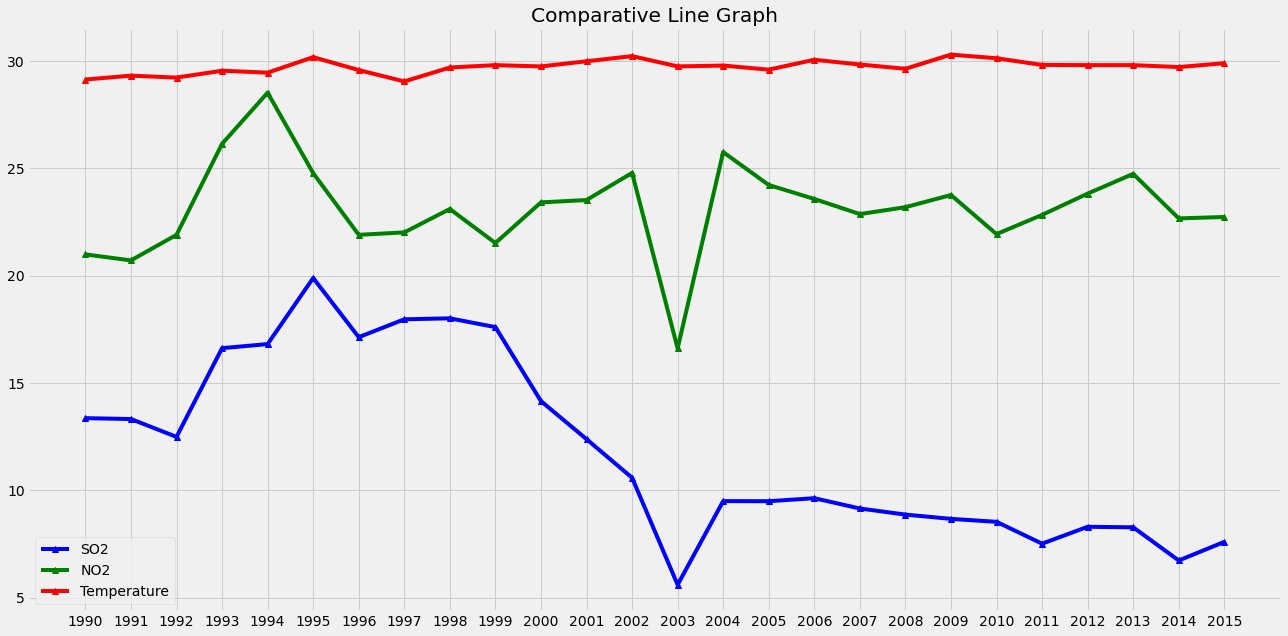

In [122]:
# The temperature has almost the same local maxima and minima as the emissions

plt.figure(figsize = (20,10))
plt.title("Comparative Line Graph")
plt.plot(l,year_mean_s02,  marker = "^", color = 'b', label = 'SO2')
plt.plot(l,year_mean_n02, marker = "^", color = 'g', label = 'NO2')
plt.plot(l,df.loc[0].tolist(), marker = "^", color = 'r', label = 'Temperature')
plt.legend()
plt.show()

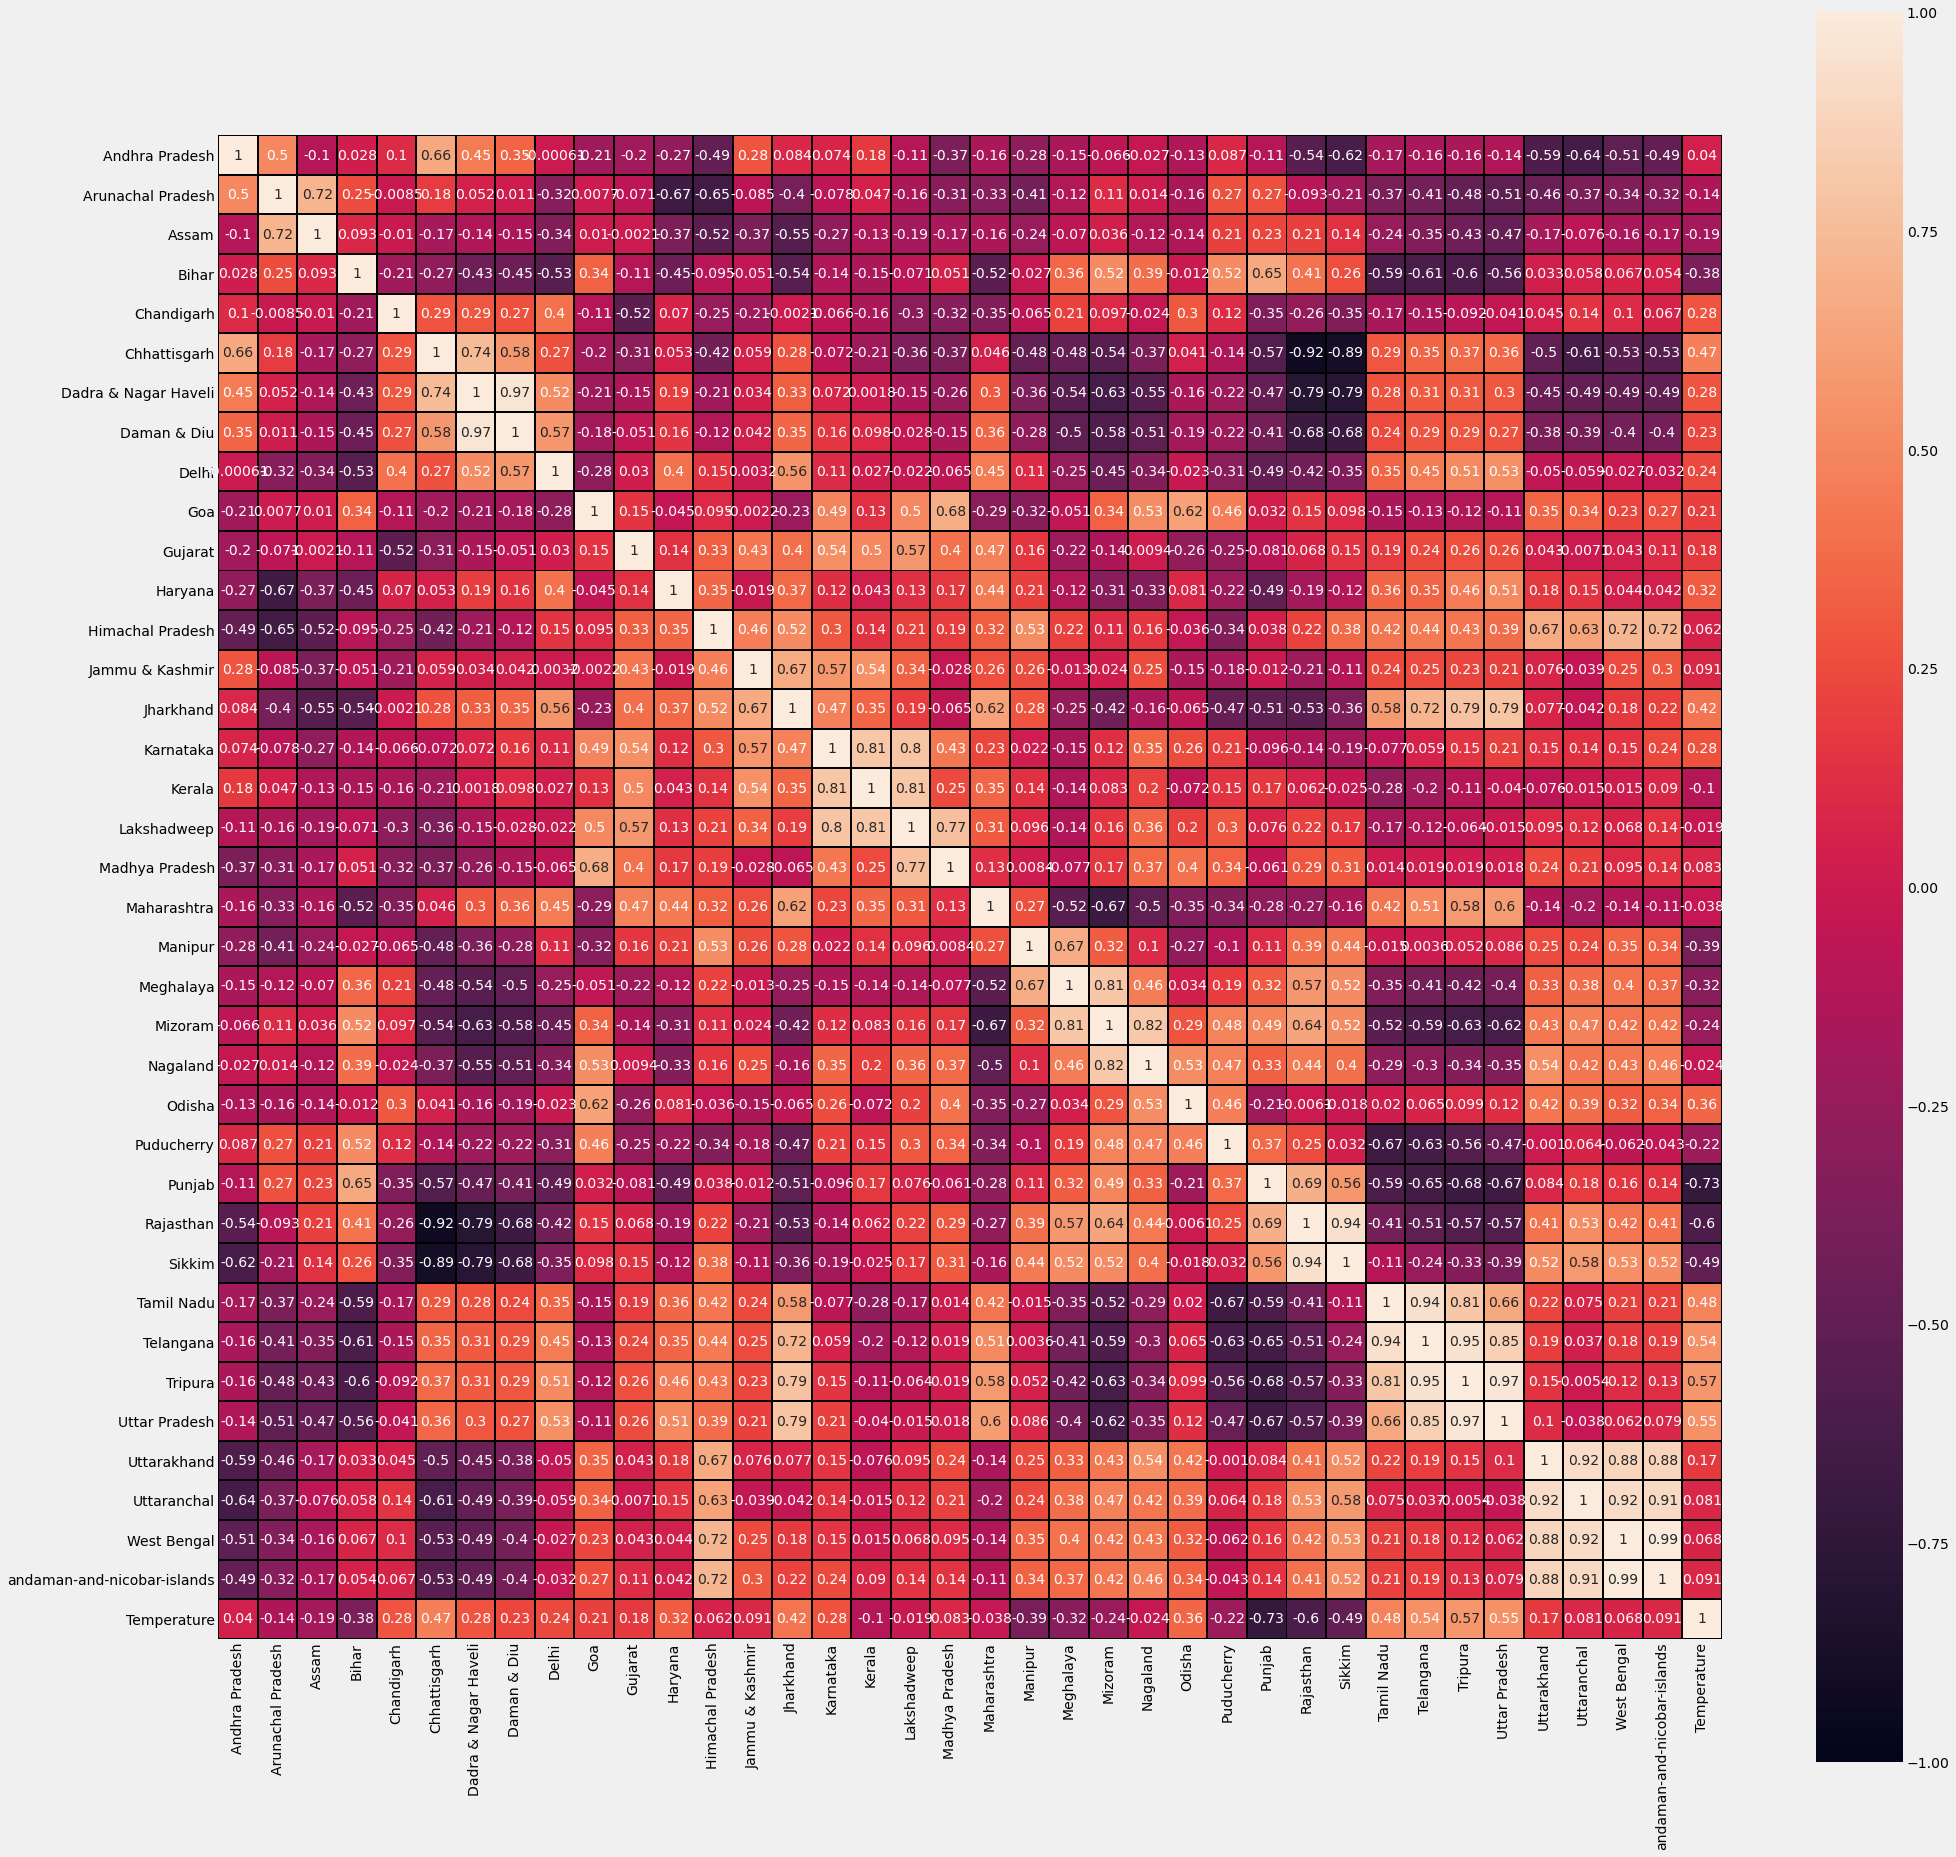

In [123]:
d1={}
for i in range(37):
    d1[states[i]]=[]
    for j in range(1,27):
        d1[states[i]].append(n02.iloc[i][j])
d1["Temperature"]=temp.iloc[0][90:116].tolist()
df1=pd.DataFrame(d1)
fig=plt.gcf()
fig.set_size_inches(30,30)
fig=sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

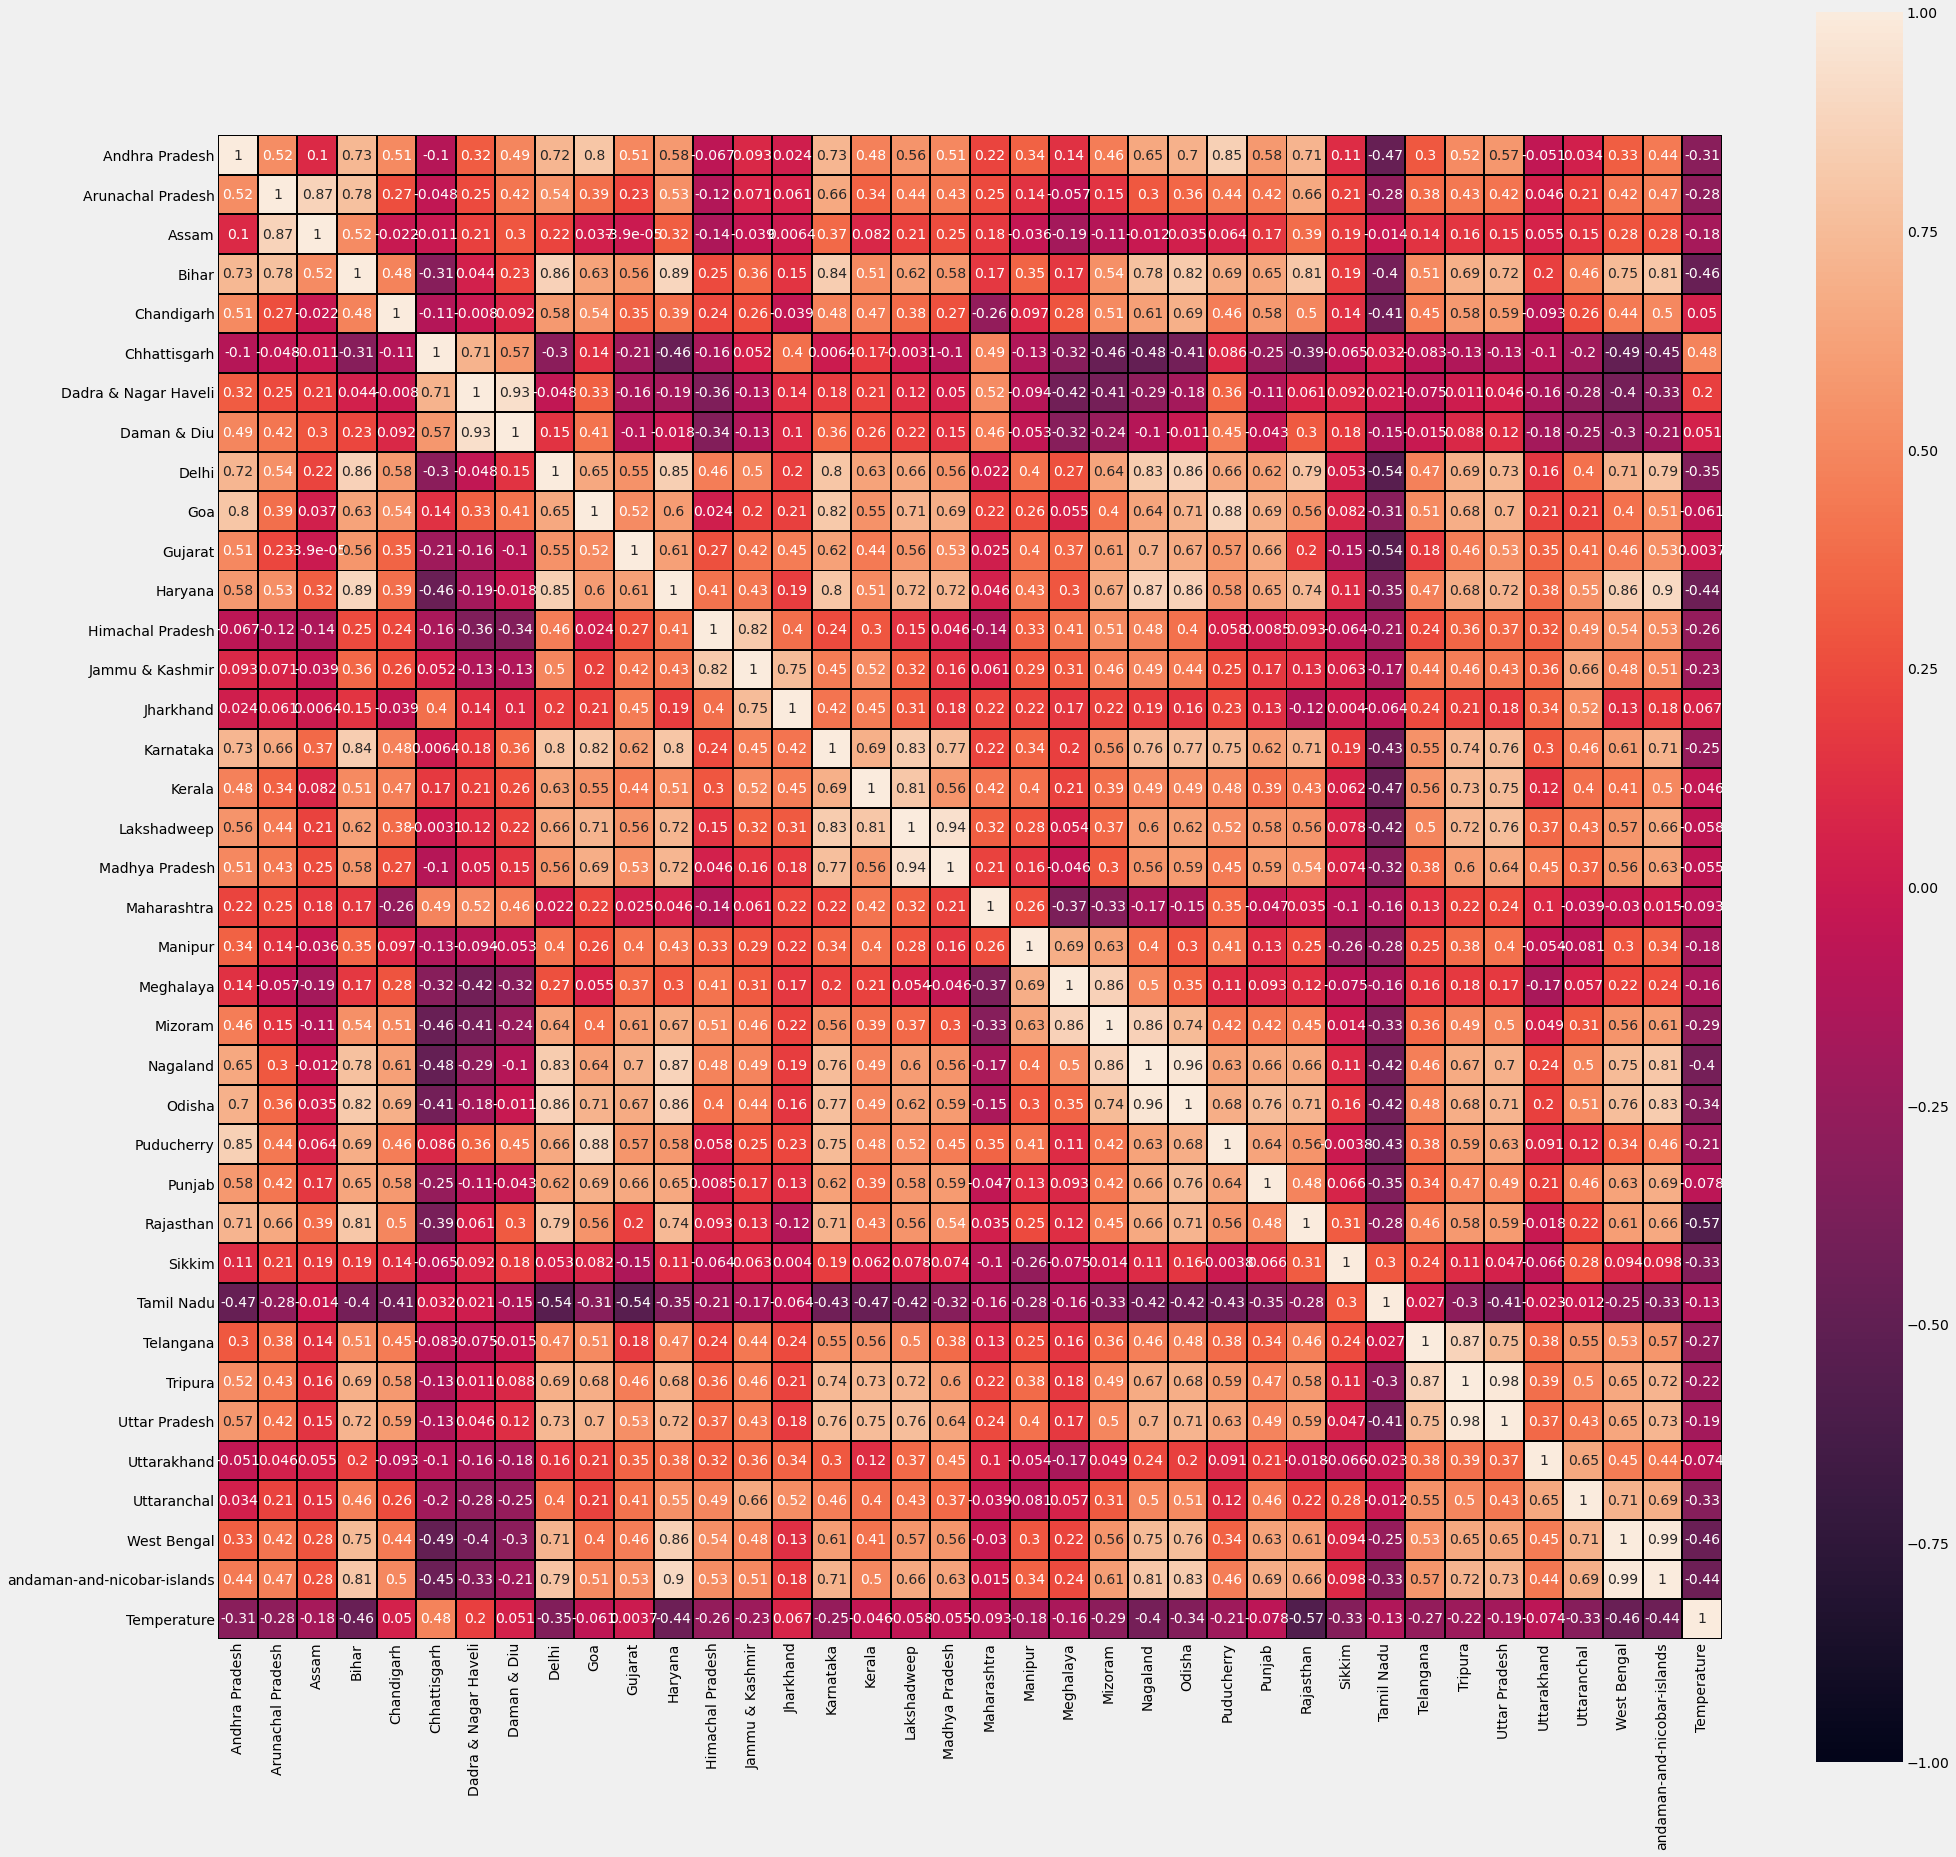

In [124]:
d1={}
for i in range(37):
    d1[states[i]]=[]
    for j in range(1,27):
        d1[states[i]].append(s02.iloc[i][j])
d1["Temperature"]=temp.iloc[0][90:116].tolist()
df1=pd.DataFrame(d1)
fig=plt.gcf()
fig.set_size_inches(30,30)
fig=sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [125]:
rain=pd.read_csv('rain_air.csv')
rain['All']=rain['All']/100
rain.head()

YEAR      All
0  1990  13.9210
1  1991  10.3320
2  1992  10.2605
3  1993  11.0060
4  1994  14.1865

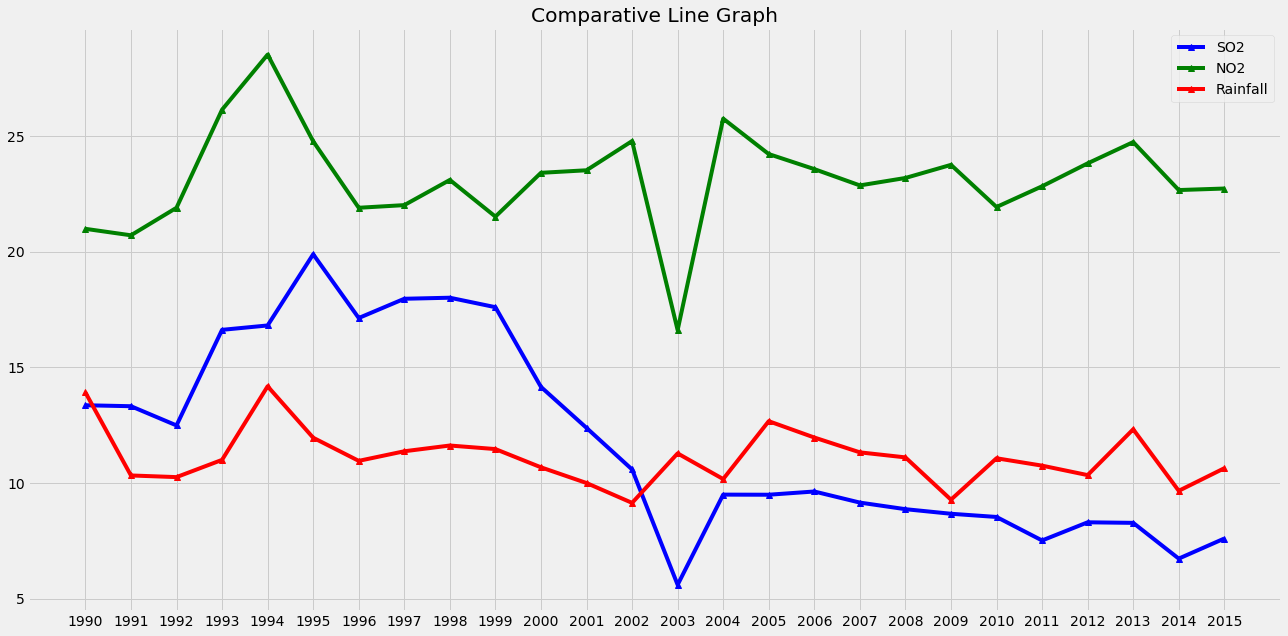

In [126]:
#Inversely dependent

plt.figure(figsize = (20,10))
plt.title("Comparative Line Graph")
plt.plot(l,year_mean_s02,  marker = "^", color = 'b', label = 'SO2')
plt.plot(l,year_mean_n02, marker = "^", color = 'g', label = 'NO2')
plt.plot(l,rain['All'], marker = "^", color = 'r', label = 'Rainfall')
plt.legend()
plt.show()

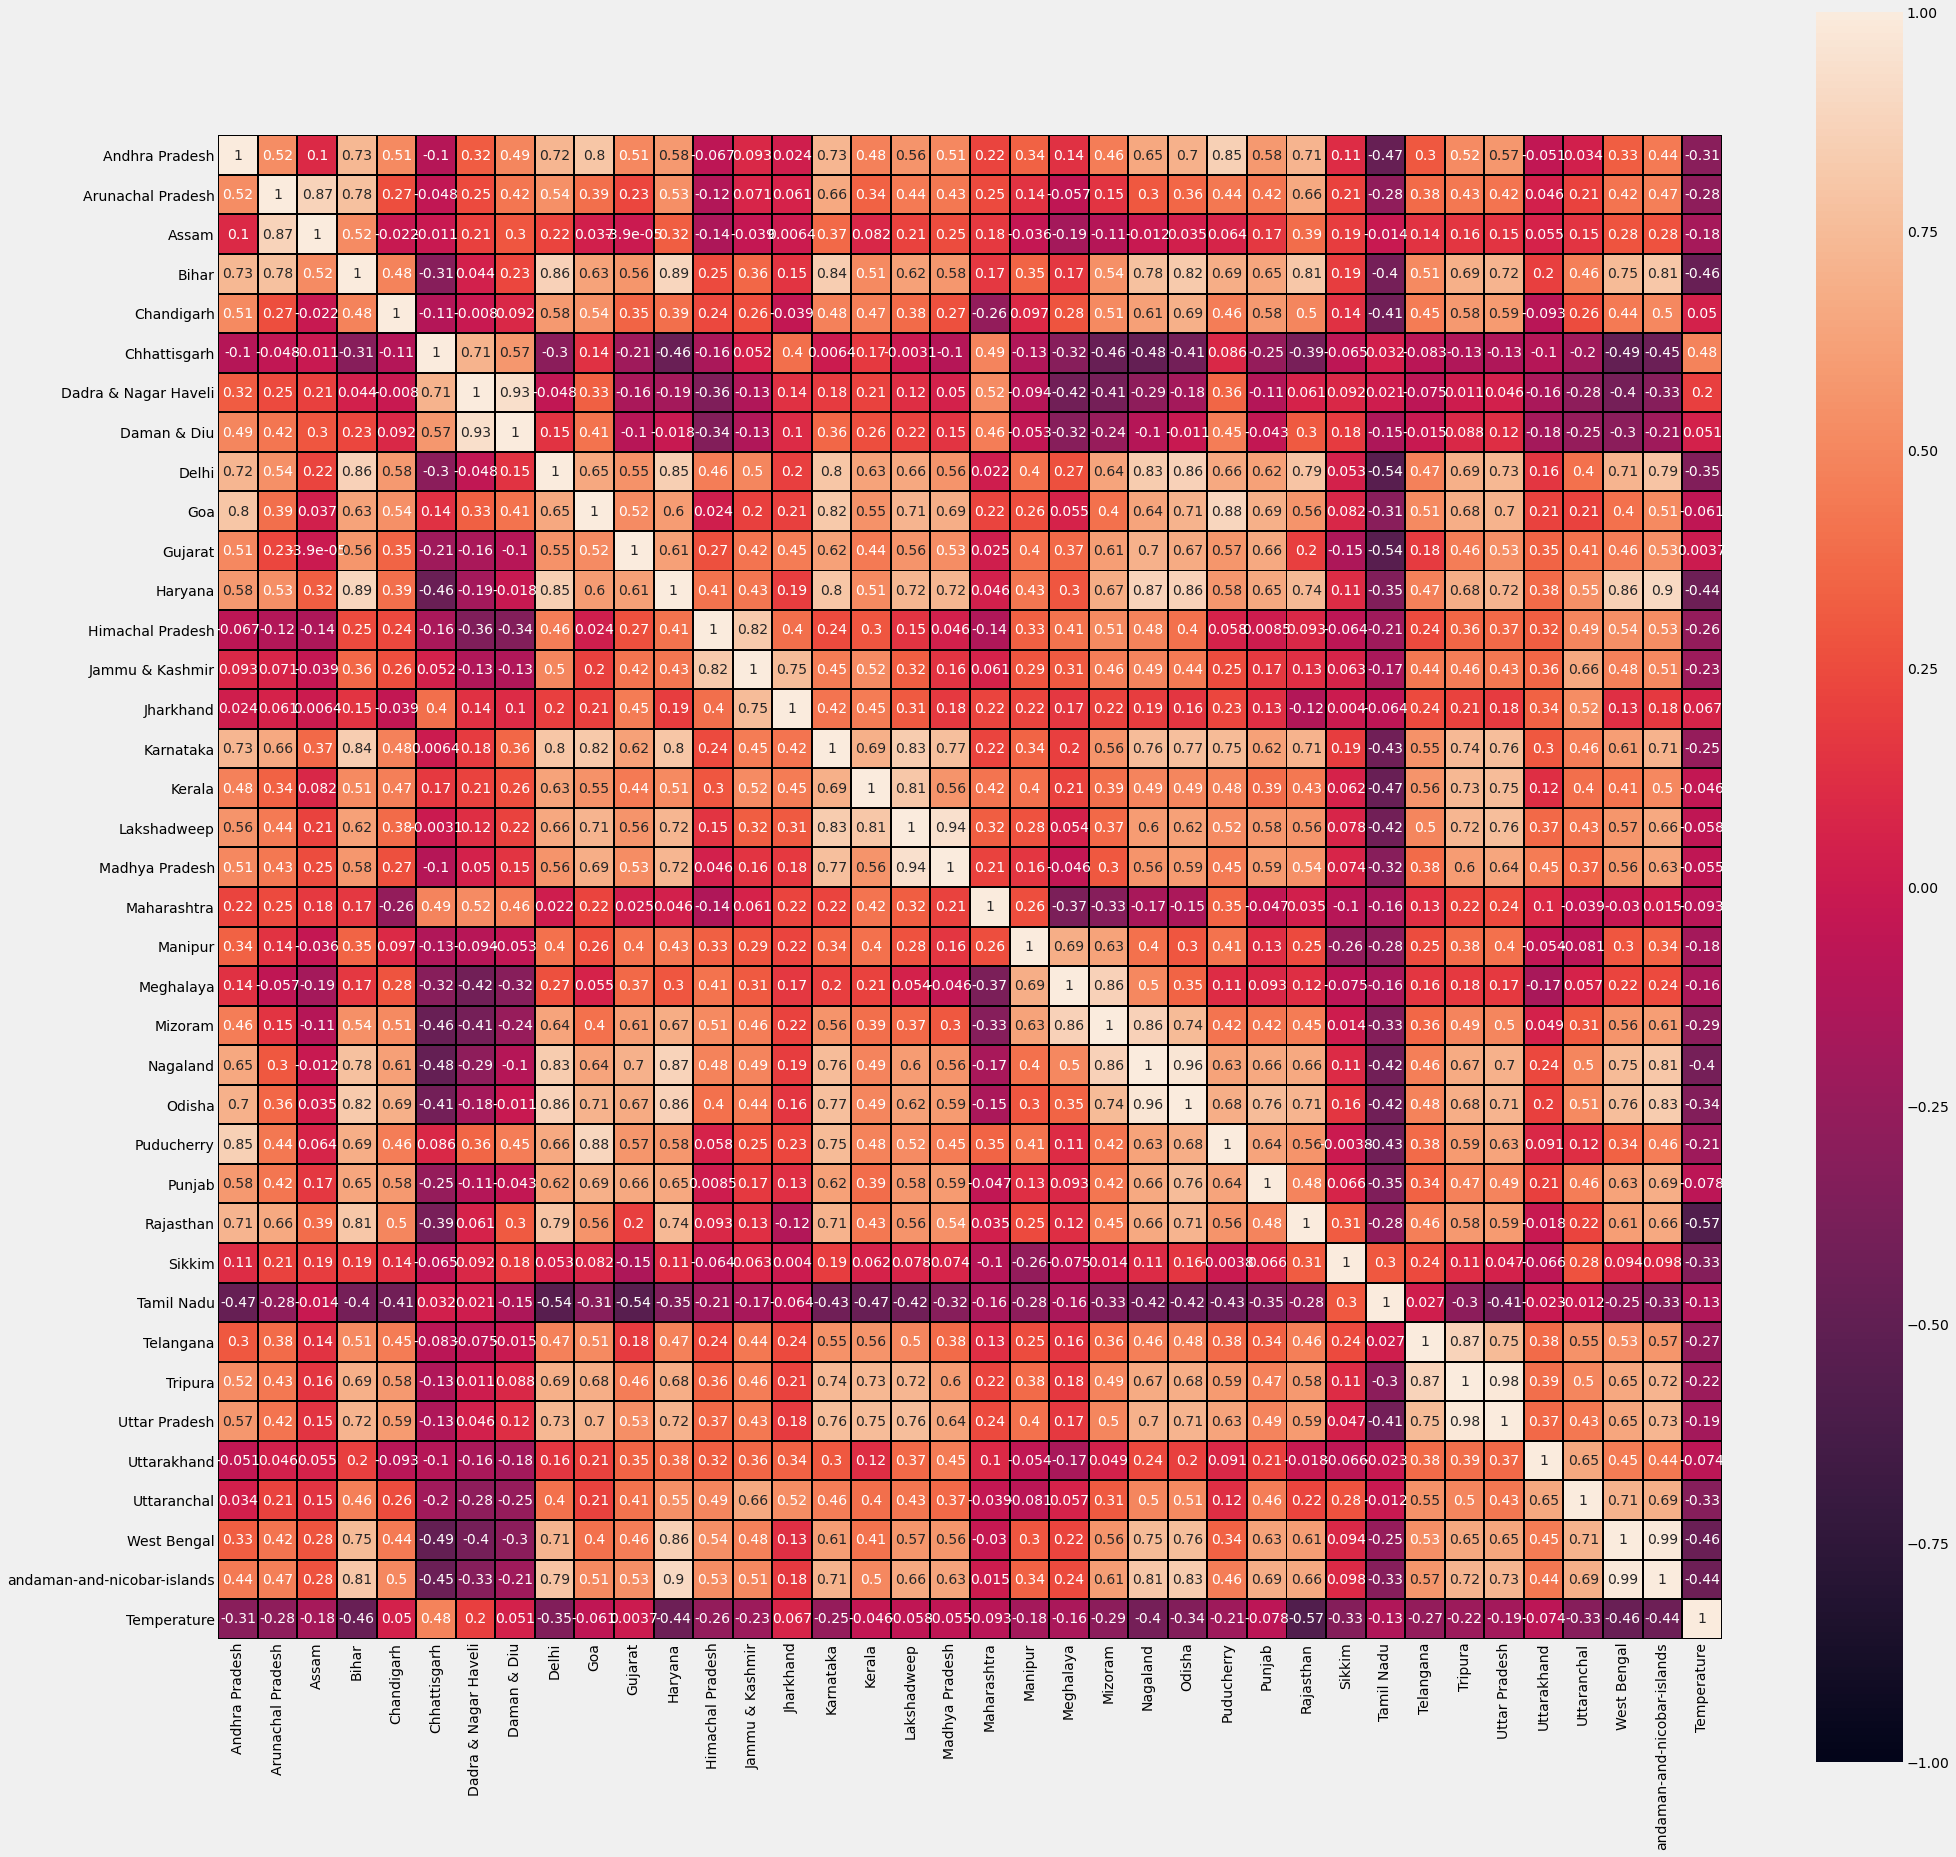

In [127]:
d2={}
for i in range(37):
    d2[states[i]]=[]
    for j in range(1,27):
        d2[states[i]].append(n02.iloc[i][j])
df3=pd.DataFrame(d2)
df3['Rainfall']=rain['All']
fig=plt.gcf()
fig.set_size_inches(30,30)
fig=sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

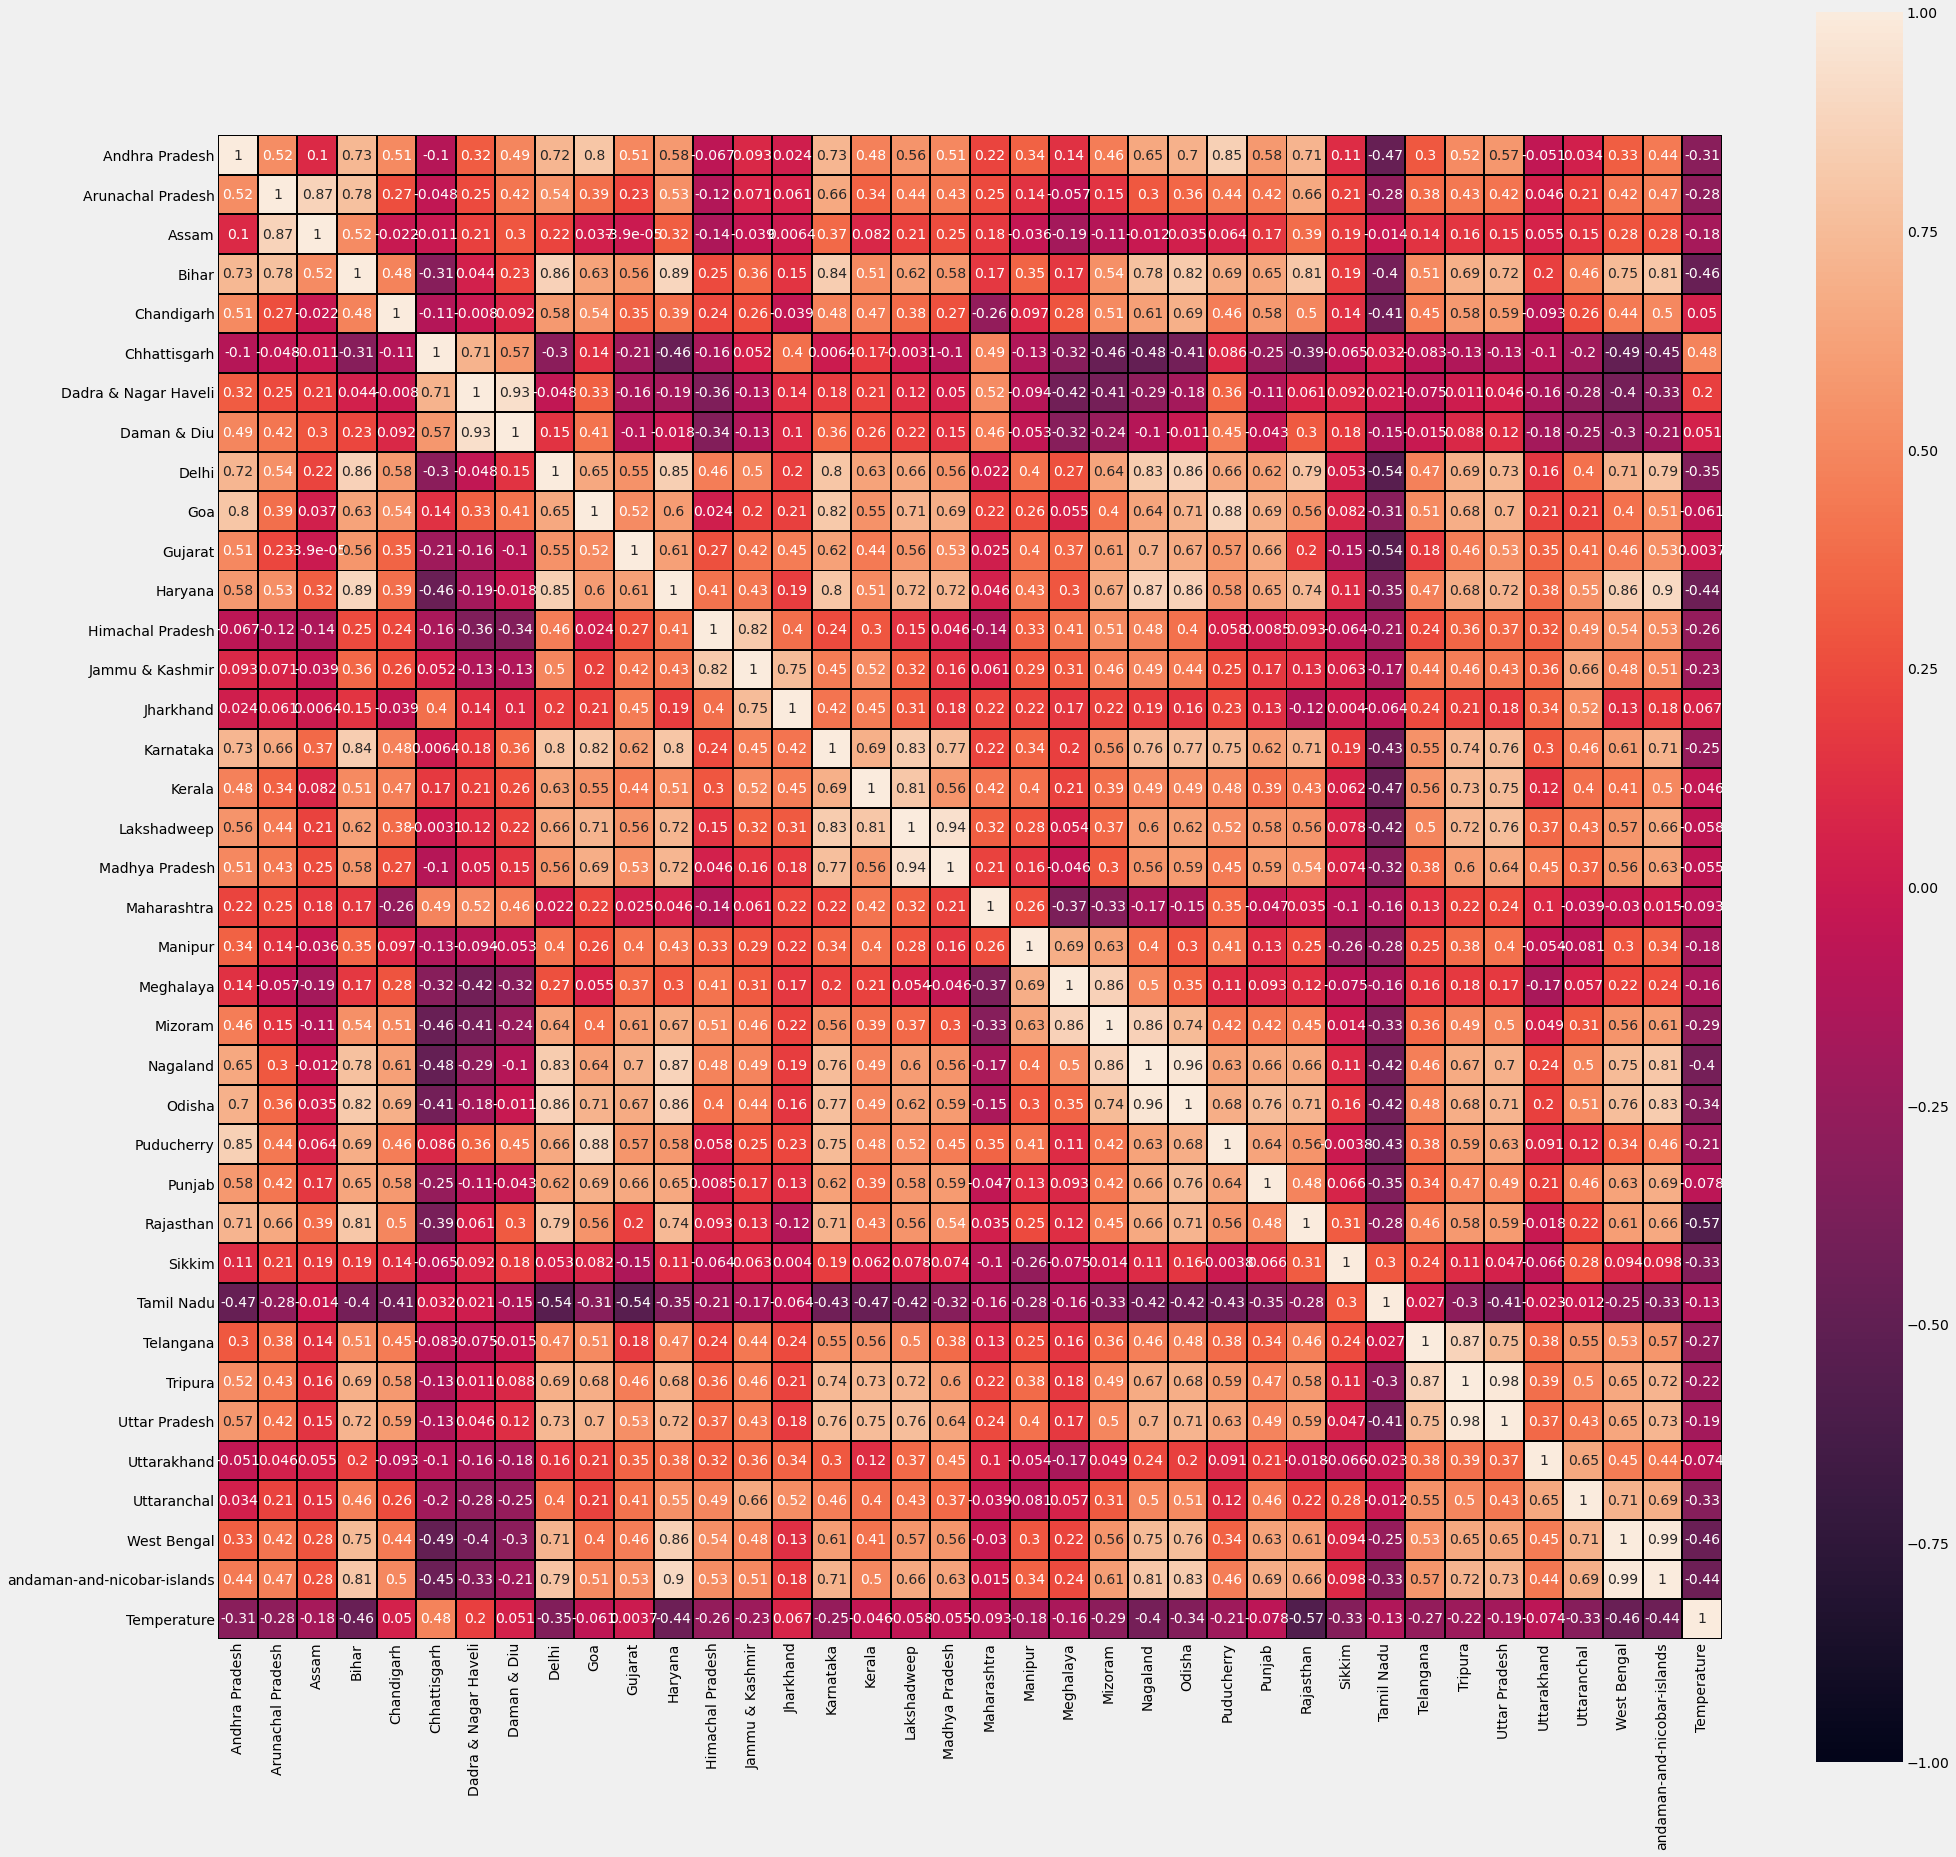

In [128]:
d3={}
for i in range(37):
    d3[states[i]]=[]
    for j in range(1,27):
        d3[states[i]].append(s02.iloc[i][j])
df3=pd.DataFrame(d3)
df3['Rainfall']=rain['All']
fig=plt.gcf()
fig.set_size_inches(30,30)
fig=sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [129]:
rt=pd.read_csv('rain_temp.csv')
rt.drop([115],inplace=True)
rt

YEAR   ANNUAL    APR     AUG   DEC    FEB    JAN     JUL     JUN  \
0    1901   993.80  26.10  285.60  1.20  31.80  26.50  237.80   77.70   
1    1902   951.60  11.00  199.30  7.30   0.70   3.40  270.70   78.80   
2    1903  1197.25   4.70  277.60  1.50   4.00   6.50  264.20  102.80   
3    1904   982.20   6.30  184.30  3.80   3.00   3.20  273.00  120.60   
4    1905   891.60  18.30  219.30  0.60  12.70   7.30  254.50   66.10   
..    ...      ...    ...     ...   ...    ...    ...     ...     ...   
110  2011  1075.65  32.75  287.50  1.15  11.20   2.10  235.60  169.85   
111  2012  1034.70  27.55  272.75  3.00   1.95  15.30  260.80   77.00   
112  2013  1232.75  24.55  243.05  2.25  23.10   2.65  301.90  212.90   
113  2014   966.80   9.35  236.05  9.00  17.45   3.85  274.75   63.10   
114  2015  1064.45  53.15  193.95  2.85   2.95  12.85  249.25  180.15   

     JAN-FEB  JUN-SEP    MAR    MAY  MAR-MAY    NOV     OCT  OCT-DEC     SEP  
0      64.30   700.90  11.10  37.30    78.60   5.40   38.60    48.80  123.40  
1       5.20   811.20   2.90  36.80    57.10  10.40   33.20    72.40  202.70  
2      14.30   866.80   1.30  56.40    80.40   1.25  141.30   170.25  210.40  
3       9.80   714.10  16.30  61.10   110.00   4.10   76.20    91.40  135.60  
4      23.40   805.40  14.30  50.40    79.60   0.70   19.60    35.60  170.20  
..       ...      ...    ...    ...      ...    ...     ...      ...     ...  
110    11.85   884.30   5.65  33.20    91.00   1.25   21.75    24.10  165.70  
111    20.90   882.65   1.75   9.95    50.90  11.60   63.50    95.65  210.00  
112    29.05   938.35   5.10  30.40    76.05   2.65  124.90   130.15  162.30  
113    28.60   759.10  20.65  55.15   118.00   3.90   42.85    68.30  153.55  
114    17.25   743.70  34.55  33.35   114.95   4.35   28.70    43.90  148.70  

[115 rows x 18 columns]

In [130]:
#This and above in tableau

te=pd.read_csv('temperatures.csv')
te.drop([115,116],inplace=True)
te

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
110  2011  24.18  26.47  30.17  31.70  34.33  33.02  31.41  30.92  30.81   
111  2012  23.61  26.44  30.20  32.46  34.30  33.60  31.88  30.96  30.65   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    29.97  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1    29.12  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2    29.04  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3    29.20  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4    30.67  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
..     ...    ...    ...     ...      ...      ...      ...      ...  
110  30.85  28.31  25.60   29.82    25.33    32.07    31.55    28.23  
111  30.20  28.11  25.34   29.81    25.03    32.33    31.77    27.88  
112  30.27  27.83  25.37   29.81    25.58    32.58    31.33    27.83  
113  30.29  28.05  25.08   29.72    24.90    31.82    32.00    27.81  
114  31.04  28.10  25.67   29.90    25.74    31.68    31.87    28.27  

[115 rows x 18 columns]

In [131]:
cropd1=pd.read_csv('cropd1.csv')

l=[]
for i in range(2004,2012):
    x=str(i)
    l.append(x)
df=temp[l]
temp_list=df.iloc[0].tolist()*12
cropd1['Temperature']=temp_list

cropd1

Unnamed: 0             Crop     Year  Production  Temperature
0            0             Rice  2004-05       100.0        29.79
1            1             Rice  2005-06       101.0        29.60
2            2             Rice  2006-07        99.0        30.06
3            3             Rice  2007-08       105.0        29.84
4            4             Rice  2008-09       112.0        29.64
..         ...              ...      ...         ...          ...
91          91  All Agriculture  2007-08       104.0        29.84
92          92  All Agriculture  2008-09       106.0        29.64
93          93  All Agriculture  2009-10       115.0        30.30
94          94  All Agriculture  2010-11       123.0        30.13
95          95  All Agriculture  2011-12       122.0        29.82

[96 rows x 5 columns]

In [132]:
year_mean_n02=[]
for i in range(2004,2012):
    year_mean_n02.append(n02[str(i)].mean())

year_mean_s02=[]
for i in range(2004,2012):
    year_mean_s02.append(s02[str(i)].mean())

s02_list=year_mean_s02*12
n02_list=year_mean_n02*12
    
cropd1['NO2']=n02_list
cropd1['SO2']=s02_list
cropd1.drop(columns=['Unnamed: 0'],inplace=True)
cropd1

Crop     Year  Production  Temperature        NO2       SO2
0              Rice  2004-05       100.0        29.79  25.758487  9.503289
1              Rice  2005-06       101.0        29.60  24.226974  9.498684
2              Rice  2006-07        99.0        30.06  23.576974  9.638816
3              Rice  2007-08       105.0        29.84  22.871711  9.159211
4              Rice  2008-09       112.0        29.64  23.193421  8.874342
..              ...      ...         ...          ...        ...       ...
91  All Agriculture  2007-08       104.0        29.84  22.871711  9.159211
92  All Agriculture  2008-09       106.0        29.64  23.193421  8.874342
93  All Agriculture  2009-10       115.0        30.30  23.760526  8.676316
94  All Agriculture  2010-11       123.0        30.13  21.938651  8.537774
95  All Agriculture  2011-12       122.0        29.82  22.834211  7.521053

[96 rows x 6 columns]

In [133]:
rain_list=[]
for i in range(14,22):
    rain_list.append(rain['All'].iloc[i])
rain_list=rain_list*12

cropd1['Rainfall']=rain_list
cropd1

Crop     Year  Production  Temperature        NO2       SO2  \
0              Rice  2004-05       100.0        29.79  25.758487  9.503289   
1              Rice  2005-06       101.0        29.60  24.226974  9.498684   
2              Rice  2006-07        99.0        30.06  23.576974  9.638816   
3              Rice  2007-08       105.0        29.84  22.871711  9.159211   
4              Rice  2008-09       112.0        29.64  23.193421  8.874342   
..              ...      ...         ...          ...        ...       ...   
91  All Agriculture  2007-08       104.0        29.84  22.871711  9.159211   
92  All Agriculture  2008-09       106.0        29.64  23.193421  8.874342   
93  All Agriculture  2009-10       115.0        30.30  23.760526  8.676316   
94  All Agriculture  2010-11       123.0        30.13  21.938651  8.537774   
95  All Agriculture  2011-12       122.0        29.82  22.834211  7.521053   

    Rainfall  
0    10.1765  
1    12.6785  
2    11.9725  
3    11.3310  
4    11.1135  
..       ...  
91   11.3310  
92   11.1135  
93    9.2850  
94   11.0755  
95   10.7565  

[96 rows x 7 columns]

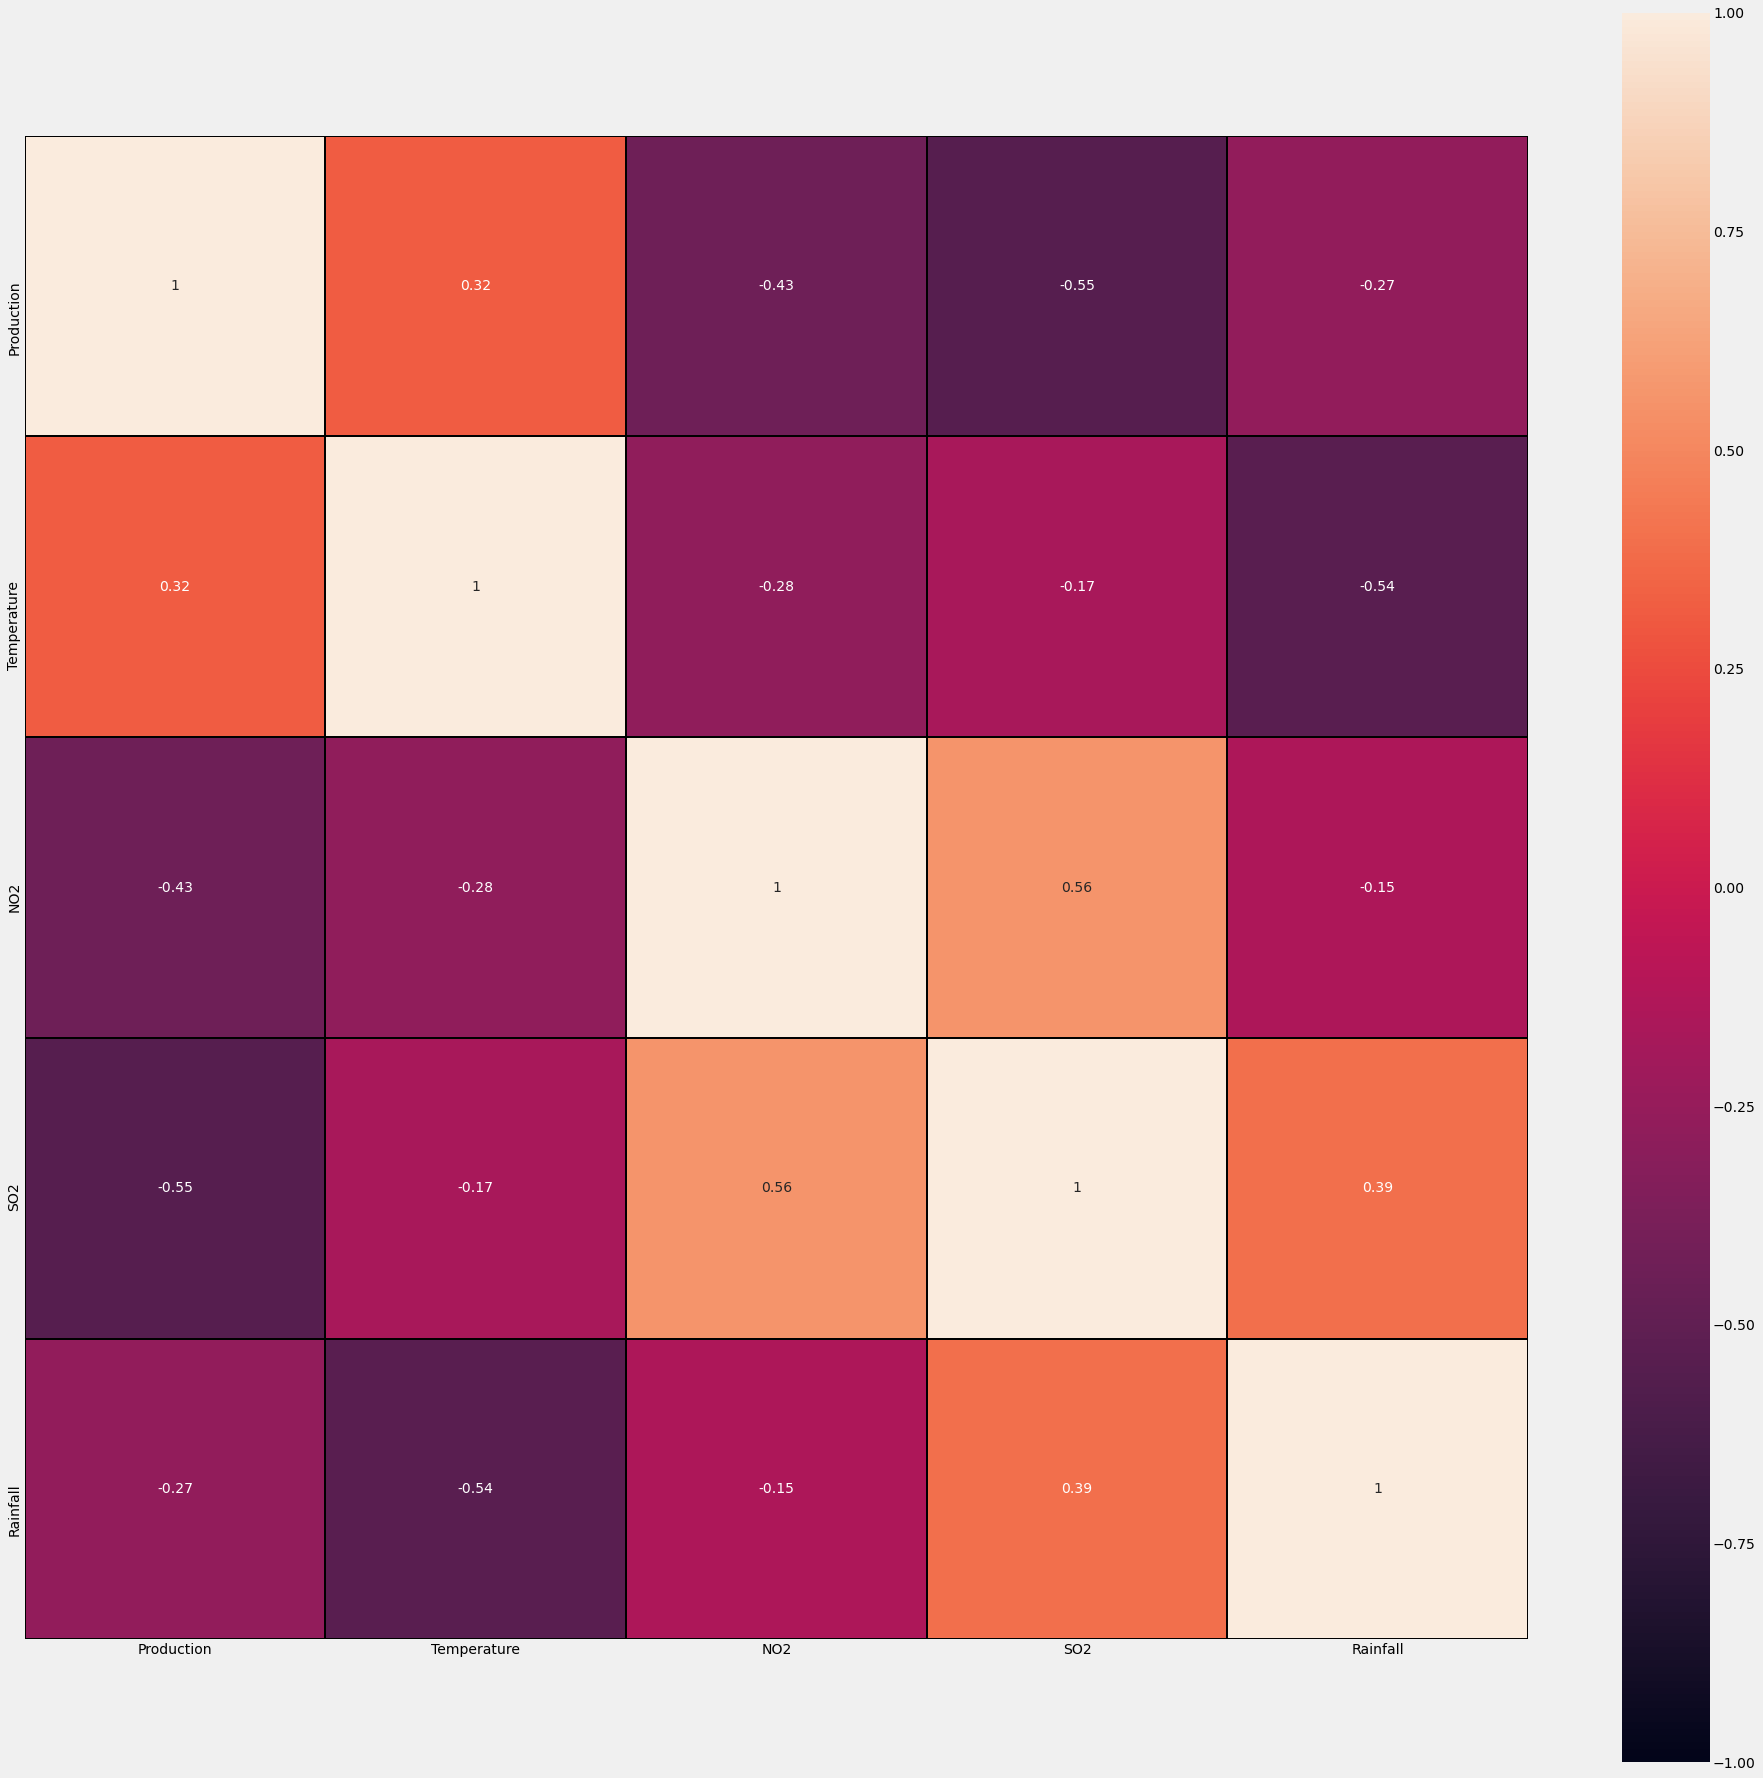

In [134]:
fig=plt.gcf()
fig.set_size_inches(30,30)
fig=sns.heatmap(cropd1.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [135]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
d1crop=cropd1.copy(deep=True)
label_encoder = preprocessing.LabelEncoder()
d1crop['Crop']= label_encoder.fit_transform(d1crop['Crop'])
d1crop['Year']= label_encoder.fit_transform(d1crop['Year'])
d1crop

Crop  Year  Production  Temperature        NO2       SO2  Rainfall
0      8     0       100.0        29.79  25.758487  9.503289   10.1765
1      8     1       101.0        29.60  24.226974  9.498684   12.6785
2      8     2        99.0        30.06  23.576974  9.638816   11.9725
3      8     3       105.0        29.84  22.871711  9.159211   11.3310
4      8     4       112.0        29.64  23.193421  8.874342   11.1135
..   ...   ...         ...          ...        ...       ...       ...
91     0     3       104.0        29.84  22.871711  9.159211   11.3310
92     0     4       106.0        29.64  23.193421  8.874342   11.1135
93     0     5       115.0        30.30  23.760526  8.676316    9.2850
94     0     6       123.0        30.13  21.938651  8.537774   11.0755
95     0     7       122.0        29.82  22.834211  7.521053   10.7565

[96 rows x 7 columns]

In [137]:
print(d1crop['Crop'].unique(),cropd1['Crop'].unique())
print(d1crop['Year'].unique(),cropd1['Year'].unique())

[ 8 11  1  7 10  4  5  2  6  9  3  0] ['Rice' 'Wheat' 'Coarse Cereals' 'Pulses' 'Vegetables ' 'Fruits' 'Milk'
 'Eggs, Fish and Meat' 'Oilseeds' 'Sugarcane ' 'Fibers' 'All Agriculture']
[0 1 2 3 4 5 6 7] ['2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10' '2010-11'
 '2011-12']


In [138]:
x = d1crop.iloc[:,[0,1,3,4,5,6]].values
y = d1crop.iloc[:,2].values

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [140]:
model=Ridge(normalize=True).fit(x_train,y_train)
pred=model.predict(x_test)
model.predict([[0,7,29.79,25.758487,9.503289,1017.65]])

array([-753.50557165])

In [141]:
reg = LinearRegression(normalize=True)
scores1 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores1

{'fit_time': array([0.0009973 , 0.0019958 , 0.00099754, 0.        , 0.00099778]),
 'score_time': array([0.0009973 , 0.00099659, 0.00099707, 0.00199485, 0.00099707]),
 'test_r2': array([-0.12120639, -0.87724928,  0.50943615, -0.1463233 ,  0.25261508]),
 'test_neg_mean_squared_error': array([ -72.12440431, -303.58397001,  -39.61744726, -230.98573206,
        -160.74365609]),
 'test_explained_variance': array([0.14355719, 0.5075552 , 0.70301344, 0.31126817, 0.32280386]),
 'test_max_error': array([-14.41394475, -35.5648638 , -13.3483139 , -30.94345483,
        -38.00632277])}

In [142]:
reg = Ridge(normalize=True)
scores2 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores2

{'fit_time': array([0.0009973 , 0.00099802, 0.00099754, 0.00099754, 0.00099659]),
 'score_time': array([0.00199318, 0.00099707, 0.00099707, 0.0009973 , 0.        ]),
 'test_r2': array([ 0.31235572, -0.816734  ,  0.48534367, -0.18168354,  0.25979234]),
 'test_neg_mean_squared_error': array([ -44.23443729, -293.79759259,  -41.56313195, -238.11086951,
        -159.20000801]),
 'test_explained_variance': array([0.47979255, 0.46743978, 0.67615541, 0.28386862, 0.31079216]),
 'test_max_error': array([-14.37709286, -35.72223257, -11.44823654, -30.91339889,
        -34.94148745])}

In [143]:
reg = Lasso(normalize=True)
scores3 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores3

{'fit_time': array([0.00099778, 0.00099659, 0.00099778, 0.00099659, 0.        ]),
 'score_time': array([0.00099754, 0.00099754, 0.00199366, 0.00099754, 0.00199556]),
 'test_r2': array([-0.00516092, -1.33074499, -0.22830544, -0.49005254, -0.01507139]),
 'test_neg_mean_squared_error': array([ -64.65948877, -376.92214006,  -99.19672262, -300.24764982,
        -218.31626883]),
 'test_explained_variance': array([ 2.27769471e-02,  0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
         1.11022302e-16]),
 'test_max_error': array([-18.37754699, -40.09090909, -14.33766234, -30.77922078,
        -30.83116883])}

In [144]:
reg = svm.SVR()
scores4 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores4

{'fit_time': array([0.0009985 , 0.00199413, 0.0009973 , 0.00099826, 0.0009973 ]),
 'score_time': array([0.00199509, 0.00199366, 0.00199533, 0.00099826, 0.00099802]),
 'test_r2': array([-0.50814484, -1.95627289,  0.12058366, -0.26026189,  0.04364116]),
 'test_neg_mean_squared_error': array([ -97.01518738, -478.08091828,  -71.02078663, -253.94451673,
        -205.68867826]),
 'test_explained_variance': array([0.15038337, 0.10673563, 0.14474914, 0.03398818, 0.06966485]),
 'test_max_error': array([-22.88560245, -43.1395158 , -16.02168527, -29.14825873,
        -33.80589339])}

In [145]:
reg = tree.DecisionTreeRegressor()
scores5 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores5

{'fit_time': array([0.00199509, 0.        , 0.00099778, 0.        , 0.        ]),
 'score_time': array([0.00099611, 0.00099707, 0.00099635, 0.00199986, 0.00199366]),
 'test_r2': array([-1.89378571, -2.49439877, -0.76613844,  0.169132  ,  0.34416939]),
 'test_neg_mean_squared_error': array([-186.15      , -565.10526316, -142.63157895, -167.42105263,
        -141.05263158]),
 'test_explained_variance': array([-1.34343788, -0.52589928, -0.69973246,  0.45816722,  0.53586976]),
 'test_max_error': array([-35., -49., -24., -32., -40.])}

In [146]:
reg = GradientBoostingRegressor()
scores6 = cross_validate(reg, x, y, cv=5,scoring=['r2','neg_mean_squared_error','explained_variance','max_error'])
scores6

{'fit_time': array([0.02592969, 0.0289259 , 0.02194095, 0.02094412, 0.02393842]),
 'score_time': array([0.0009973 , 0.00099421, 0.        , 0.00099754, 0.00099707]),
 'test_r2': array([-1.45792719, -2.00107687, -0.4242387 ,  0.32686009,  0.5583998 ]),
 'test_neg_mean_squared_error': array([-158.1123111 , -485.32650256, -115.02009687, -135.63862332,
         -94.97707169]),
 'test_explained_variance': array([-0.68972417, -0.18515408, -0.35079248,  0.45406721,  0.64122097]),
 'test_max_error': array([-28.43238504, -47.70019593, -21.8490132 , -25.59504298,
        -26.64269948])}

In [147]:
algo=['Linear Regression','Ridge Regression','Lasso Regression','Support Vector Machine','Decision Tree','Gradient Booster']
fittime=[scores1['fit_time'].mean(),scores2['fit_time'].mean(),scores3['fit_time'].mean(),scores4['fit_time'].mean(),scores5['fit_time'].mean(),scores6['fit_time'].mean()]
scoretime=[scores1['score_time'].mean(),scores2['score_time'].mean(),scores3['score_time'].mean(),scores4['score_time'].mean(),scores5['score_time'].mean(),scores6['score_time'].mean()]
r2=[scores1['test_r2'].mean(),scores2['test_r2'].mean(),scores3['test_r2'].mean(),scores4['test_r2'].mean(),scores5['test_r2'].mean(),scores6['test_r2'].mean()]
mean=[scores1['test_neg_mean_squared_error'].mean(),scores2['test_neg_mean_squared_error'].mean(),scores3['test_neg_mean_squared_error'].mean(),scores4['test_neg_mean_squared_error'].mean(),scores5['test_neg_mean_squared_error'].mean(),scores6['test_neg_mean_squared_error'].mean()]
variance=[scores1['test_explained_variance'].mean(),scores2['test_explained_variance'].mean(),scores3['test_explained_variance'].mean(),scores4['test_explained_variance'].mean(),scores5['test_explained_variance'].mean(),scores6['test_explained_variance'].mean()]
maxerr=[scores1['test_max_error'].mean(),scores2['test_max_error'].mean(),scores3['test_max_error'].mean(),scores4['test_max_error'].mean(),scores5['test_max_error'].mean(),scores6['test_max_error'].mean()]

In [156]:
mlmodels=pd.DataFrame()
mlmodels['Algorithms']=algo
mlmodels['Fit Time']=fittime
mlmodels['Score Time']=scoretime
mlmodels['R2']=r2
mlmodels['Neg Mean Squared Error']=mean
mlmodels['Explained Variance']=variance
mlmodels['Neg Max Error']=maxerr
mlmodels

Algorithms  Fit Time  Score Time        R2  \
0       Linear Regression  0.000998    0.001197 -0.076546   
1        Ridge Regression  0.000997    0.000997  0.011815   
2        Lasso Regression  0.000798    0.001396 -0.413867   
3  Support Vector Machine  0.001197    0.001596 -0.512091   
4           Decision Tree  0.000599    0.001397 -0.928204   
5        Gradient Booster  0.024336    0.000797 -0.599597   

   Neg Mean Squared Error  Explained Variance  Neg Max Error  
0             -161.411042            0.397640     -26.455380  
1             -155.381208            0.443610     -25.480490  
2             -211.868454            0.004555     -26.883302  
3             -221.150017            0.101104     -29.000191  
4             -240.472105           -0.315007     -36.000000  
5             -197.814921           -0.026077     -30.043867

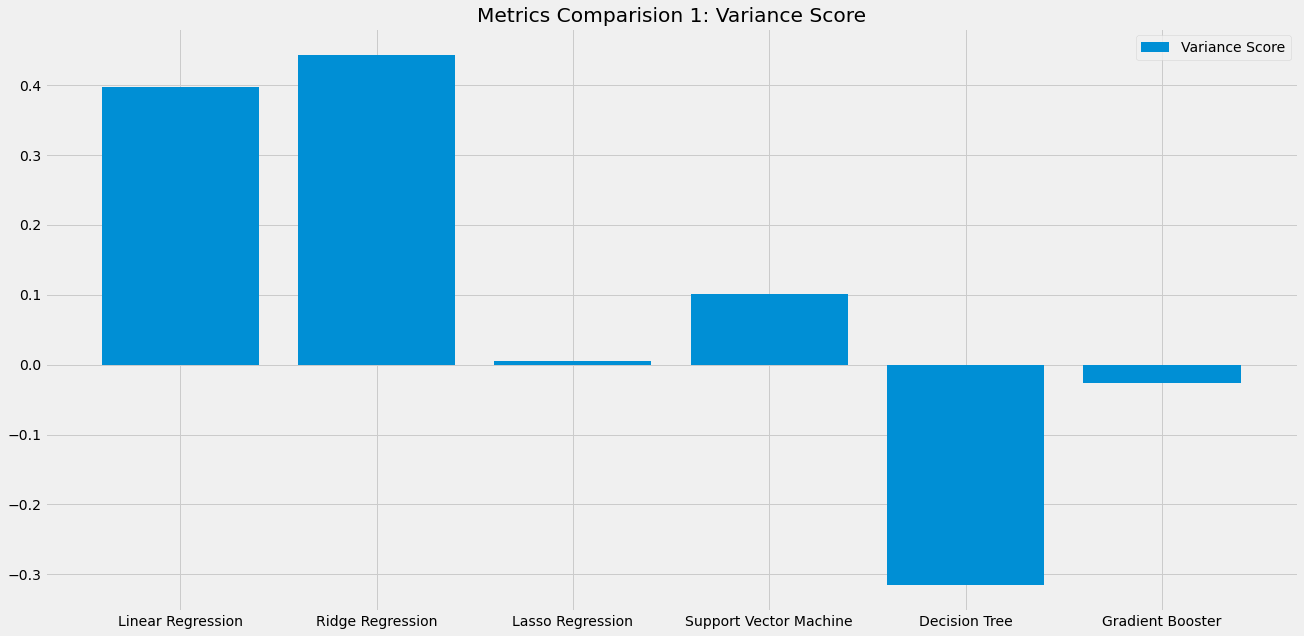

In [148]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 1: Variance Score")
plt.bar(algo,variance, label = 'Variance Score')
plt.legend()
plt.show()

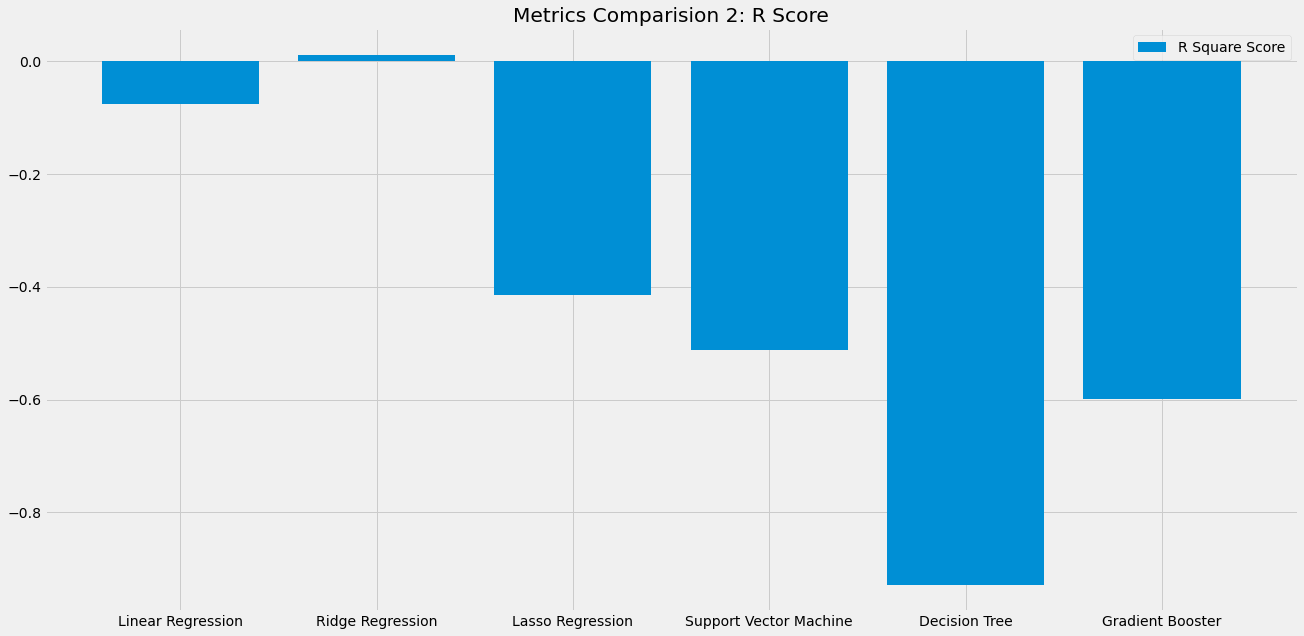

In [149]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 2: R Score")
plt.bar(algo,r2,label = 'R Square Score')
plt.legend()
plt.show()

<BarContainer object of 6 artists>

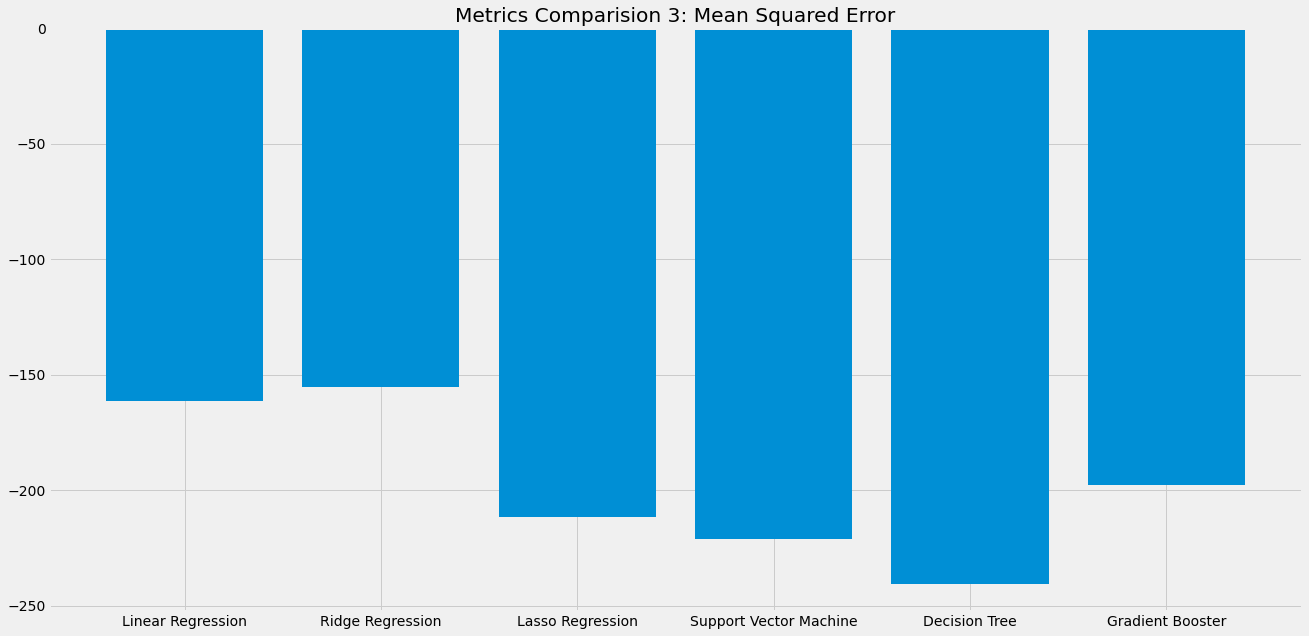

In [150]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 3: Mean Squared Error")
plt.bar(algo,mean)

<BarContainer object of 6 artists>

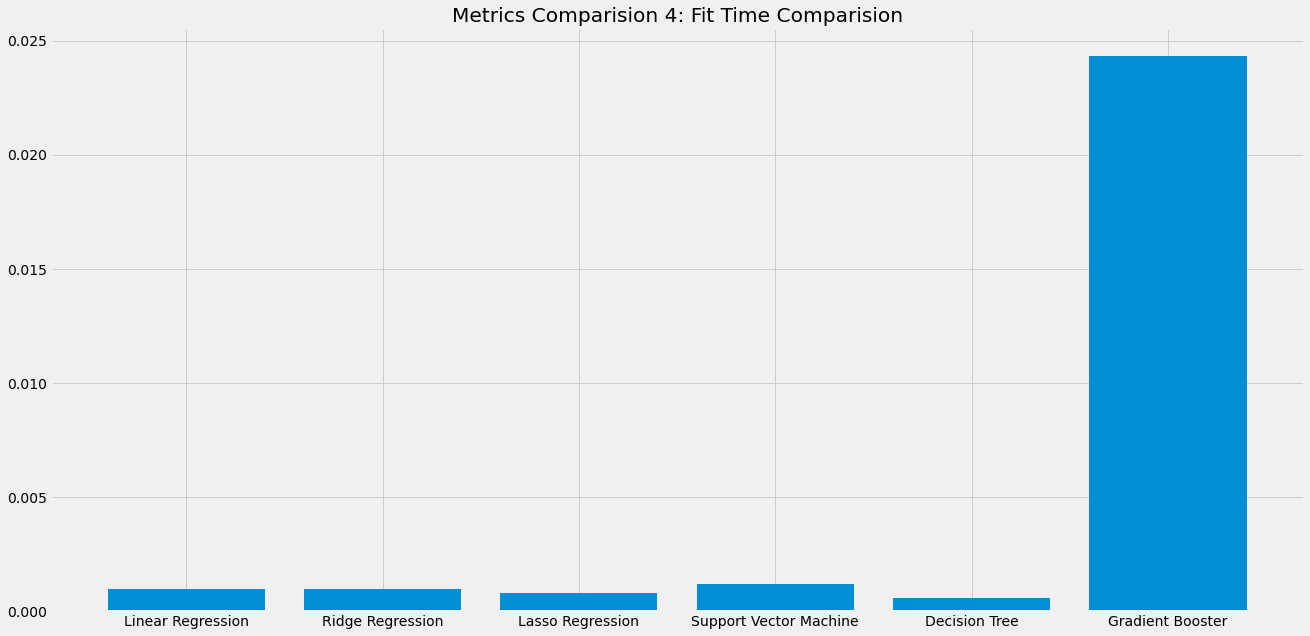

In [151]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 4: Fit Time Comparision")
plt.bar(algo,fittime)

<BarContainer object of 6 artists>

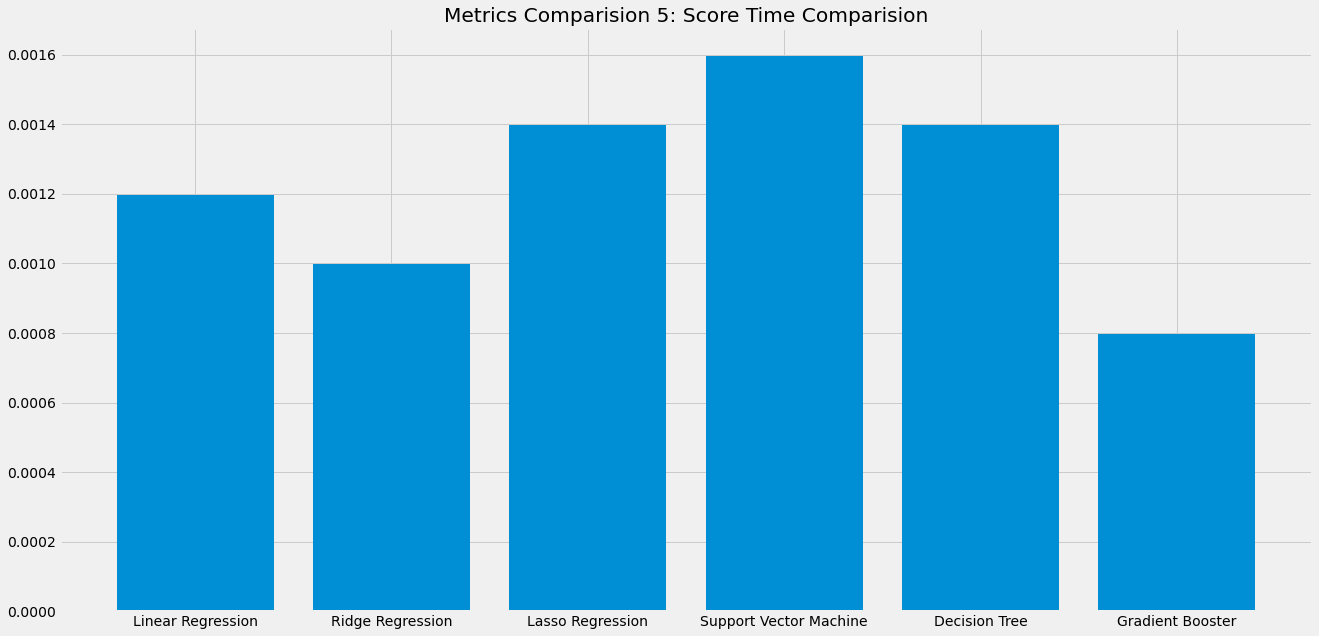

In [152]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 5: Score Time Comparision")
plt.bar(algo,scoretime)

<BarContainer object of 6 artists>

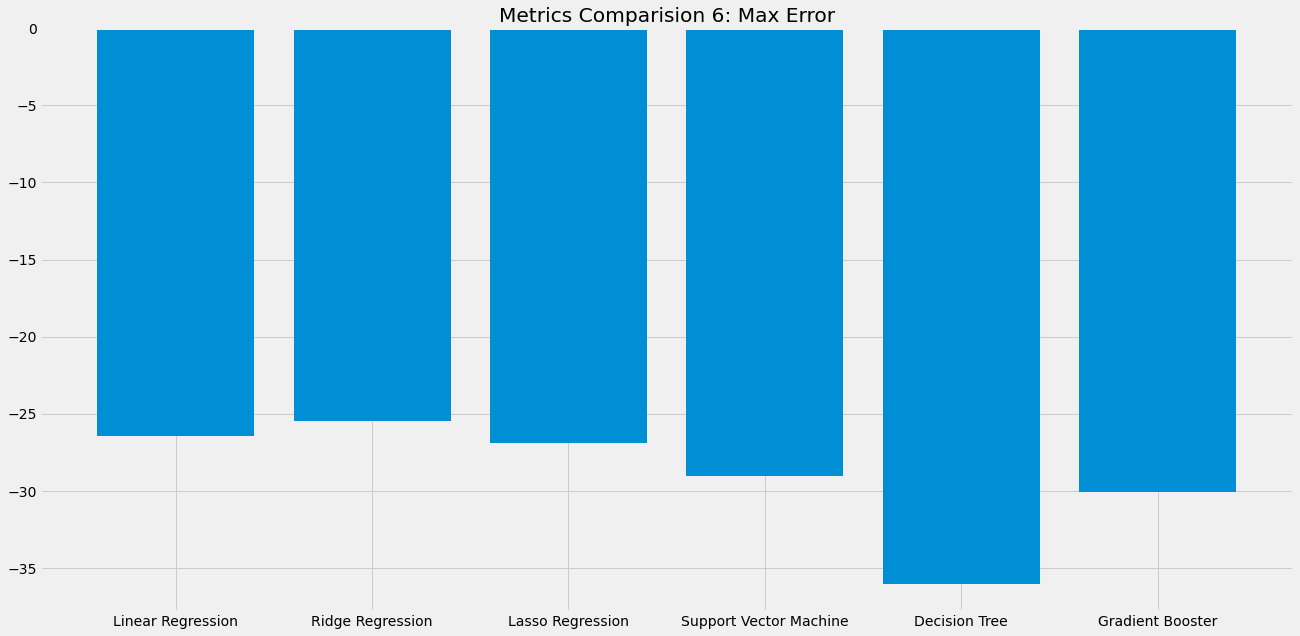

In [153]:
plt.figure(figsize = (20,10))
plt.title("Metrics Comparision 6: Max Error")
plt.bar(algo,maxerr)